In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [3]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [5]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
47814,0.73,Ideal,J,SI1,62.0,56.0,1902,5.74,5.78,3.57
14379,0.30,Very Good,G,VS1,62.2,59.0,605,4.24,4.28,2.65
118,0.70,Ideal,E,VS2,60.7,58.0,2762,5.73,5.76,3.49
41912,0.42,Very Good,E,VVS2,59.4,60.0,1262,4.88,4.91,2.91
31047,0.41,Ideal,H,VS1,61.8,56.0,750,4.73,4.78,2.94


In [53]:
# Converting categorical data into numerical 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label = le.fit_transform(Diamonds['cut'])
label1 = le.fit_transform(Diamonds['color'])
label3 = le.fit_transform(Diamonds['clarity'])

In [54]:
label

array([2, 4, 2, ..., 4, 3, 3], dtype=int64)

In [55]:
label1

array([6, 3, 1, ..., 0, 4, 5], dtype=int64)

In [56]:
label3

array([2, 4, 5, ..., 3, 3, 3], dtype=int64)

In [57]:
Diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [58]:
Diamonds["cut"] = label
Diamonds["color"] = label1
Diamonds["clarity"] = label3

In [59]:
Diamonds

,carat,depth,table,price,x,y,z,cut,color,clarity
47814,0.73,62.0,56.0,1902,5.74,5.78,3.57,2,6,2
14379,0.30,62.2,59.0,605,4.24,4.28,2.65,4,3,4
118,0.70,60.7,58.0,2762,5.73,5.76,3.49,2,1,5
41912,0.42,59.4,60.0,1262,4.88,4.91,2.91,4,1,7
31047,0.41,61.8,56.0,750,4.73,4.78,2.94,2,4,4
...,...,...,...,...,...,...,...,...,...,...
23080,2.00,61.4,59.0,11108,8.07,8.00,4.93,3,4,3
36185,0.32,60.9,58.0,931,4.49,4.45,2.72,4,1,6
5466,0.91,63.9,56.0,3837,6.06,6.09,3.88,4,0,3
3163,0.94,61.9,57.0,3335,6.29,6.21,3.87,3,4,3


In [99]:
# Data Wrangling

x = Diamonds[['cut', 'color', 'clarity', 'carat']]
y = Diamonds['price']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [101]:
# Cross Validation using K-fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [110]:
kfold = KFold(5)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [10788 10789 10790 ... 53937 53938 53939], test: [    0     1     2 ... 10785 10786 10787]
train: [    0     1     2 ... 53937 53938 53939], test: [10788 10789 10790 ... 21573 21574 21575]
train: [    0     1     2 ... 53937 53938 53939], test: [21576 21577 21578 ... 32361 32362 32363]
train: [    0     1     2 ... 53937 53938 53939], test: [32364 32365 32366 ... 43149 43150 43151]
train: [    0     1     2 ... 43149 43150 43151], test: [43152 43153 43154 ... 53937 53938 53939]


In [111]:
print(cross_val_score(lm, x, y, cv=3))

[0.87494648 0.88106984 0.87612208]


In [103]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [105]:
predictions = lm.predict(x_test)
predictions

array([4664.03403665, 6518.27914926, 5127.85658166, ...,  950.13580925,
       3770.34784974, 1470.72110841])

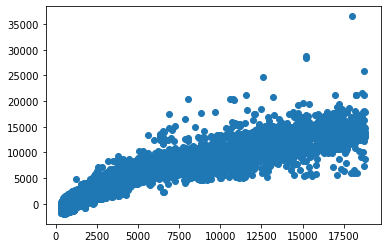

In [106]:
plt.scatter(y_test, predictions)

In [107]:
# Accuracy score:

print("Score:", lm.score(x_test, y_test))

Score: 0.875722277385429


In [108]:
# Examining Error using RSME

np.sqrt(metrics.mean_squared_error(y_test, predictions))

1395.6593136678828

In [109]:
# Examining Error using MAE

metrics.mean_absolute_error(y_test, predictions)

939.6494128141101